ID #1:

ID #2:

# Part 1: Linear Regression

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. Submission includes this notebook only with the exercise number and your ID as the filename. For example: `123456789_987654321.ipynb` if you submitted in pairs and `123456789.ipynb` if you submitted the exercise alone.
1. Write **efficient vectorized** code whenever possible. Some calculations in this exercise take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deduction.
1. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
1. Write your functions in this notebook only. **Do not create Python modules and import them**.
1. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/), and the already imported libraries. **Do not import anything else.**


## In this exercise you will perform the following:
1. Load a dataset and perform basic data exploration using a powerful data science library called [pandas](https://pandas.pydata.org/pandas-docs/stable/).
1. Preprocess the data for linear regression.
1. Compute the cost and perform gradient descent in pure numpy in vectorized form.
1. Fit a linear regression model using a single feature.
1. Visualize your results using matplotlib.
1. Perform multivariate linear regression.
1. Pick the best features in the dataset.
1. Experiment with adaptive learning rates.

In [1]:
import numpy as np # used for scientific computing
import pandas as pd # used for data analysis and manipulation
import matplotlib.pyplot as plt # used for visualization and plotting

np.random.seed(42) 

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Data Preprocessing

For the following exercise, we will use a dataset containing housing prices in King County, USA. The dataset contains 5,000 observations with 18 features and a single target value - the house price. 

First, we will read and explore the data using pandas and the `.read_csv` method. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [2]:
# Read comma separated data
df = pd.read_csv('data.csv') # Make sure this cell runs regardless of your absolute path.
# df stands for dataframe, which is the default format for datasets in pandas


### Data Exploration
A good practice in any data-oriented project is to first try and understand the data. Fortunately, pandas is built for that purpose. Start by looking at the top of the dataset using the `df.head()` command. This will be the first indication that you read your data properly, and that the headers are correct. Next, you can use `df.describe()` to show statistics on the data and check for trends and irregularities.

In [3]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,5.000000e+03,5.000000e+03,5000.0000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,4.630823e+09,5.394699e+05,3.3714,2.062150,2061.036800,1.615893e+04,1.432600,0.009400,0.243000,3.455000,7.595200,1753.151000,1966.660800,95.052800,98078.812600,47.559312,-122.215864,1976.84520,13451.164600
std,2.870890e+09,3.873115e+05,0.9104,0.773592,923.727509,4.600220e+04,0.510793,0.096506,0.774643,0.677692,1.166537,818.390844,28.286855,425.234932,54.126332,0.139521,0.141807,674.73601,26514.749009
min,1.000102e+06,7.500000e+04,0.0000,0.000000,380.000000,6.090000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.00000,660.000000
25%,2.154075e+09,3.179062e+05,3.0000,1.500000,1410.000000,5.400000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1949.000000,0.000000,98033.000000,47.463675,-122.329000,1490.00000,5391.500000
50%,4.022900e+09,4.490000e+05,3.0000,2.000000,1890.000000,7.875000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,1968.000000,0.000000,98070.000000,47.572850,-122.235000,1820.00000,7800.000000
75%,7.345078e+09,6.500000e+05,4.0000,2.500000,2500.000000,1.123400e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,1990.000000,0.000000,98118.000000,47.679200,-122.129000,2340.00000,10469.250000
max,9.842300e+09,7.060000e+06,9.0000,6.750000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7680.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.00000,434728.000000


We will start with one variable linear regression by extracting the target column and the `sqft_living` variable from the dataset. We use pandas and select both columns as separate variables and transform them into a numpy array.

In [5]:
X = df['sqft_living'].values
y = df['price'].values

## Preprocessing

As the number of features grows, calculating gradients gets computationally expensive. We can speed this up by normalizing the input data to ensure all values are within the same range. This is especially important for datasets with high standard deviations or differences in the ranges of the attributes. Use min_max normalization for the fearures (`X`) and the true labels (`y`).

Implement the cost function `preprocess`.

In [6]:
def preprocess(X, y):
    """
    Perform min max normalization on the features and true labels.

    Input:
    - X: Inputs (n features over m instances). # a matrix where each row represents an instance and each column represents a different feature
    - y: True labels.

    Returns a two vales:
    - X: The normalized inputs.
    - y: The normalized labels.
    """
    X_min = X.min(axis=0) # we use axis=0 to compute the minimum and maximum values column-wise, ensuring that we get the minimum and maximum values for each feature 
    X_max = X.max(axis=0)
    X = (X - X_min) / (X_max - X_min)
    
    y_min = y.min()
    y_max = y.max()
    y = (y - y_min) / (y_max - y_min)
   
    return X, y

In [7]:
X, y = preprocess(X, y)

We will split the data into two datasets: 
1. The training dataset will contain 80% of the data and will always be used for model training.
2. The validation dataset will contain the remaining 20% of the data and will be used for model evaluation. For example, we will pick the best alpha and the best features using the validation dataset, while still training the model using the training dataset.

In [8]:
# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train], X[idx_val]
y_train, y_val = y[idx_train], y[idx_val]
#X_train,y_train(4000, )
# X_val, y_val (1000, )


## Data Visualization
Another useful tool is data visualization. Since this problem has only two parameters, it is possible to create a two-dimensional scatter plot to visualize the data. Note that many real-world datasets are highly dimensional and cannot be visualized naively. We will be using `matplotlib` for all data visualization purposes since it offers a wide range of visualization tools and is easy to use.

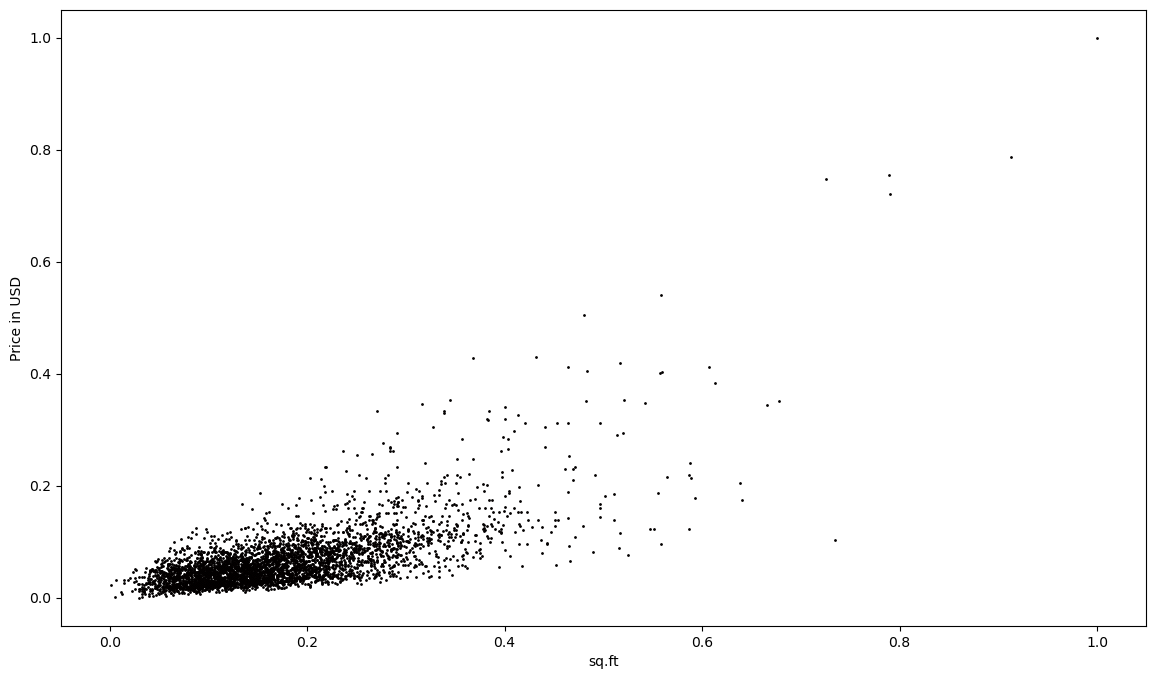

In [9]:
plt.plot(X_train, y_train, 'ro', ms=1, mec='k') # the parameters control the size, shape and color of the scatter plot
plt.ylabel('Price in USD')
plt.xlabel('sq.ft')
plt.show()

## Bias Trick

Make sure that `X` takes into consideration the bias $\theta_0$ in the linear model. Hint, recall that the predications of our linear model are of the form:

$$
\hat{y} = h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

Add columns of ones as the zeroth column of the features (do this for both the training and validation sets).

In [10]:
X_train = X_train.reshape(-1, 1) # turn it from #(4000,) to (4000, 1)
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train]) # to (4000,2)


X_val= X_val.reshape(-1,1) #(1000, 1)
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])



## Single Variable Linear Regression
Simple linear regression is a linear regression model with a single explanatory varaible and a single target value. 

$$
\hat{y} = h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

## Gradient Descent 

Our task is to find the best possible linear line that explains all the points in our dataset. We start by guessing initial values for the linear regression parameters $\theta$ and updating the values using gradient descent. 

The objective of linear regression is to minimize the cost function $J$:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{n}(h_\theta(x^{(i)})-y^{(i)})^2
$$

where the hypothesis (model) $h_\theta(x)$ is given by a **linear** model:

$$
h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

$\theta_j$ are parameters of your model. and by changing those values accordingly you will be able to lower the cost function $J(\theta)$. One way to accopmlish this is to use gradient descent:

$$
\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
$$

In linear regresion, we know that with each step of gradient descent, the parameters $\theta_j$ get closer to the optimal values that will achieve the lowest cost $J(\theta)$.

Implement the cost function `compute_cost`.

In [11]:
def compute_cost(X, y, theta):
    """
    Computes the average squared difference between an observation's actual and
    predicted values for linear regression.

    Input:
    - X: inputs  (n features over m instances).
    - y: true labels (1 value over m instances).
    - theta: the parameters (weights) of the model being learned.

    Returns a single value:
    - J: the cost associated with the current set of parameters (single number).
    """

    # y^
    predictions = np.dot(X, theta) # (4000,2)*(2,) using broadcasting  -> (4000,)

    # squared differences between predictions and actual values
    squared_errors = (predictions - y) ** 2 

    # Compute the mean squared error 
    J = np.sum(squared_errors) / (2 * X.shape[0]) # 2*4000 instances 

    return J


In [12]:
theta = np.array([-1, 2]) # initial thetas (2,)
J = compute_cost(X_train, y_train, theta) 
J

0.2695467296184012

Implement the gradient descent function `gradient_descent`.

In [13]:
def gradient_descent(X, y, theta, alpha, num_iters):
    """
    Learn the parameters of the model using gradient descent using 
    the *training set*. Gradient descent is an optimization algorithm 
    used to minimize some (loss) function by iteratively moving in 
    the direction of steepest descent as defined by the negative of 
    the gradient. We use gradient descent to update the parameters
    (weights) of our model.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).
    - theta: The parameters (weights) of the model being learned.
    - alpha: The learning rate of your model.
    - num_iters: The number of updates performed.

    Returns two values:
    - theta: The learned parameters of your model.
    - J_history: the loss value for every iteration.
    """
    
    J_history = [] # Use a python list to save cost in every iteration
    theta = theta.copy() # avoid changing the original thetas
    
    for iteration in range(num_iters):
        predictions = np.dot(X, theta) # (4000,2)*(2,) using broadcasting  -> (4000,)
        errors = predictions - y #(4000,)
        gradients = np.dot(X.T, errors) / X.shape[0] #doing tranpsose so (2,4000)*(4000,) + broadcasting #(ℎ𝜃(𝑥(𝑖))−𝑦(𝑖))𝑥(𝑖)𝑗 /m
        theta -= alpha * gradients #𝛼1(ℎ𝜃(𝑥(𝑖))−𝑦(𝑖))𝑥(𝑖)𝑗 /m
        
        cost = compute_cost(X, y, theta)
        J_history.append(cost)
    
    return theta, J_history


In [14]:
np.random.seed(42)
theta = np.random.random(size=2)
iterations = 40000
alpha = 0.1
theta, J_history = gradient_descent(X_train ,y_train, theta, alpha, iterations)
theta #array([-0.00444154,  0.40875196])
J_history[-1] #0.0008040562476843767

0.0008040562476843767

You can evaluate the learning process by monitoring the loss as training progress. In the following graph, we visualize the loss as a function of the iterations. This is possible since we are saving the loss value at every iteration in the `J_history` array. This visualization might help you find problems with your code. Notice that since the network converges quickly, we are using logarithmic scale for the number of iterations. 

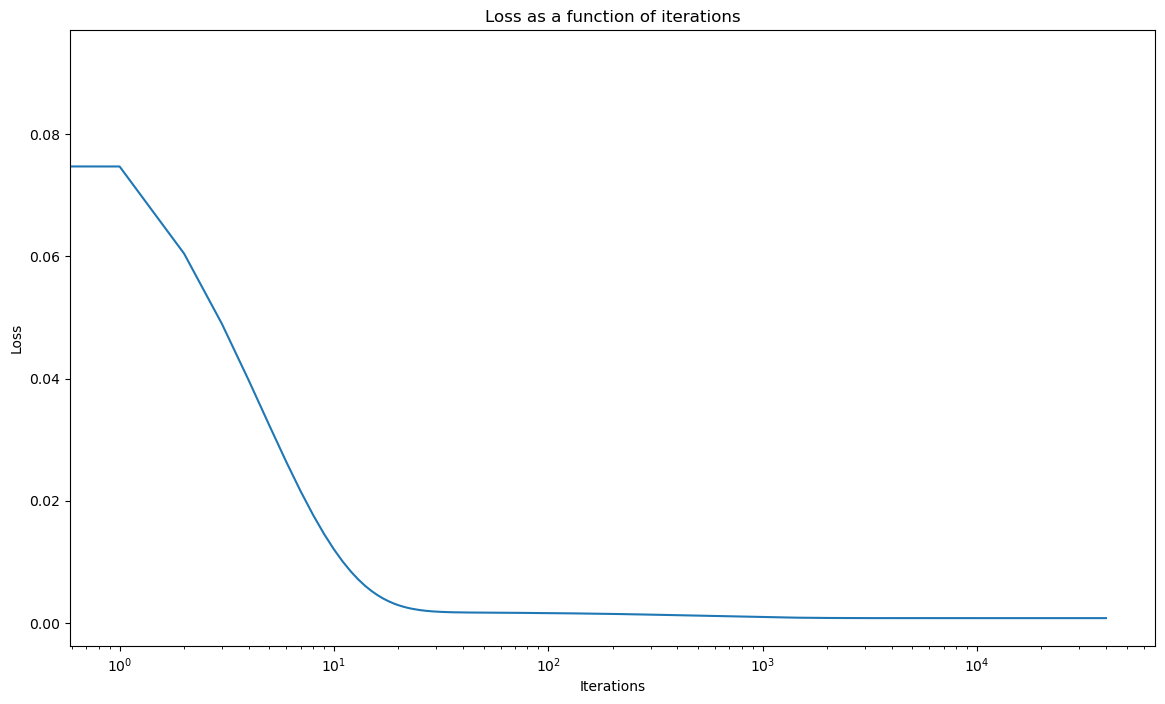

In [15]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.show()

Implement the pseudo-inverse function `pinv`. **Do not use `np.linalg.pinv`**, instead use only direct matrix multiplication as you saw in class (you can calculate the inverse of a matrix using `np.linalg.inv`). 

In [16]:
def pinv(X, y):
    """
    Calculate the optimal values of the parameters using the pseudoinverse
    approach as you saw in class using the *training set*.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).

    Returns two values:
    - theta: The optimal parameters of your model.

    ########## DO NOT USE np.linalg.pinv ##############
    """
    
    # Calculate the pseudo-inverse of X
    X_pseudo_inv = np.linalg.inv(X.T.dot(X)).dot(X.T) #(2,4000)*(4000,2)= inverse(2,2) * (2,4000)= 2,4000
    
    # Compute theta using pseudo-inverse
    theta_opt = X_pseudo_inv.dot(y) # vector of optimal parameters (2,4000)*(4000, ) = (2,)

    
    return theta_opt

In [17]:
theta_pinv = pinv(X_train ,y_train)
print(theta_pinv)
J_pinv = compute_cost(X_train, y_train, theta_pinv)
J_pinv

[-0.00444154  0.40875196]


0.0008040562476843767

We can add the loss value for the theta calculated using the psuedo-inverse to our graph. This is another sanity check as the loss of our model should converge to the psuedo-inverse loss.

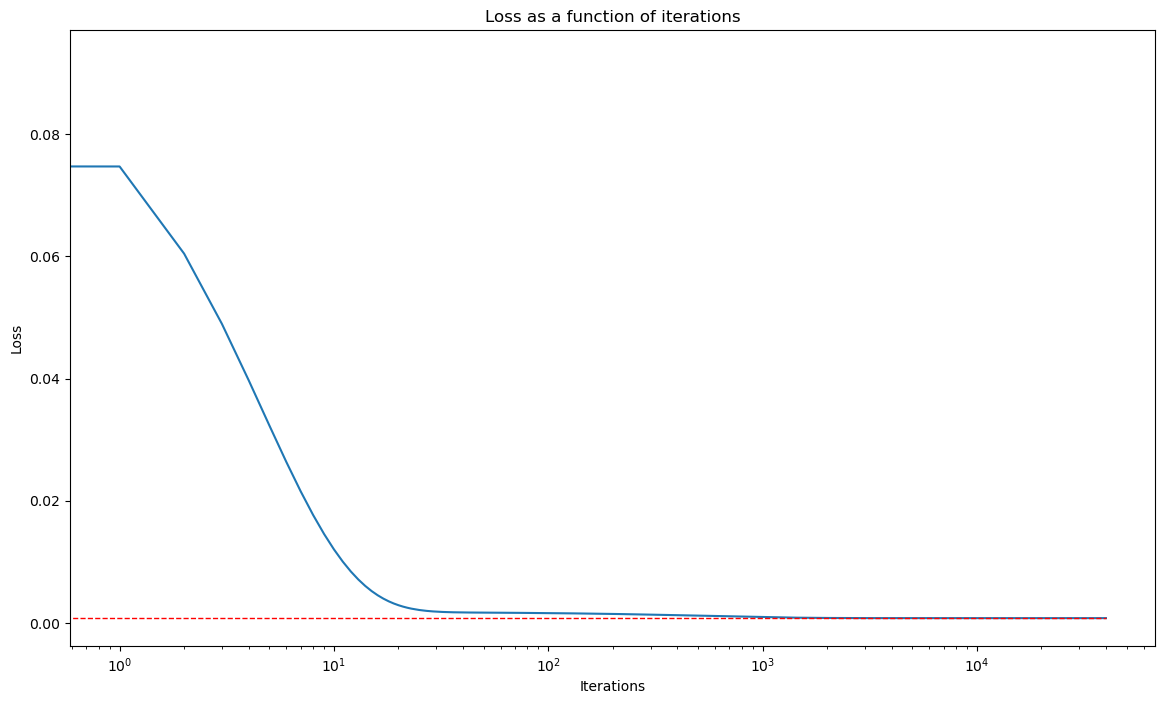

In [18]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history), color='r',
           linewidth = 1, linestyle = 'dashed')
plt.show()

We can use a better approach for the implementation of `gradient_descent`. Instead of performing 40,000 iterations, we wish to stop when the improvement of the loss value is smaller than `1e-8` from one iteration to the next. Implement the function `efficient_gradient_descent`. 

In [19]:
def efficient_gradient_descent(X, y, theta, alpha, num_iters):
    """
    Learn the parameters of the model using gradient descent using 
    the *training set*. Gradient descent is an optimization algorithm 
    used to minimize some (loss) function by iteratively moving in 
    the direction of steepest descent as defined by the negative of 
    the gradient. We use gradient descent to update the parameters
    (weights) of our model.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).
    - theta: The parameters (weights) of the model being learned.
    - alpha: The learning rate of your model.
    - num_iters: The number of updates performed.

    Returns two values:
    - theta: The learned parameters of your model.
    - J_history: the loss value for every iteration.
    """
    
    J_history = [] # Use a python list to save cost in every iteration
    theta = theta.copy() # avoid changing the original thetas
    
    for iteration in range(num_iters):
        predictions = np.dot(X, theta) # (4000,2)*(2,) using broadcasting  -> (4000,)
        errors = predictions - y #(4000,)-(4000,)=(4000,)
        gradients = np.dot(X.T, errors) / X.shape[0] #doing tranpsose to (4000,2) so (2,4000)*(4000,) + broadcasting #(ℎ𝜃(𝑥(𝑖))−𝑦(𝑖))𝑥(𝑖)𝑗 /m
        theta -= alpha * gradients #𝛼1(ℎ𝜃(𝑥(𝑖))−𝑦(𝑖))𝑥(𝑖)𝑗 /m
        
        cost = compute_cost(X, y, theta)
        J_history.append(cost)
        
        if iteration > 0 and abs(J_history[iteration] - J_history[iteration - 1]) < 1e-8: # iteration > 0 so the check starts from the second iteration
            break

    
    return theta, J_history

np.random.seed(42)
theta = np.random.random(size=2)
iterations = 40000
alpha = 0.1
theta, J_history = efficient_gradient_descent(X_train ,y_train, theta, alpha, iterations)
theta #array([-0.01055681,  0.44336663]))
J_history[-1] #0.0008096059345101558

0.0008096059345101558

The learning rate is another factor that determines the performance of our model in terms of speed and accuracy. Complete the function `find_best_alpha`. Make sure you use the training dataset to learn the parameters (thetas) and use those parameters with the validation dataset to compute the cost.

In [20]:
def find_best_alpha(X_train, y_train, X_val, y_val, iterations):
    """
    Iterate over provided values of alpha and train a model using the 
    *training* dataset. Maintain a python dictionary with alpha as the 
    key and the loss on the *validation* set as the value.

    Input:
    - X_train, y_train, X_val, y_val: the training and validation data
    - iterations: maximum number of iterations

    Returns:
    - alpha_dict: A python dictionary - {key (alpha) : value (validation loss)}
    """
    
    alphas = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 2, 3]
    alpha_dict = {}
    theta = np.zeros(X_train.shape[1]) # initializing theta as an array of zeros with a length equal to the number of features
    
    for alpha in alphas: # for each alpha we'll find the thetas using  efficient_gradient_descent, and using those thetas the cost, we'll choose the alpha that we'll give us the thetas the casuse min J
   
        
        theta, _ = efficient_gradient_descent(X_train, y_train, theta, alpha, iterations) # using _ because we're not interseted in J_history, only the thetas
        
        # Compute the cost using theta on the validation set
        J_val = compute_cost(X_val, y_val, theta)
        
        # Store the validation loss calculated by thetas of each a in the dictionary
        alpha_dict[alpha] = J_val
    
    return alpha_dict


In [21]:
alpha_dict = find_best_alpha(X_train, y_train, X_val, y_val, 40000)
print(alpha_dict)

{1e-05: 0.0021976294278536865, 3e-05: 0.0014232806671305056, 0.0001: 0.0013295178803192397, 0.0003: 0.001304111482592083, 0.001: 0.001182134914933948, 0.003: 0.0008544936044350188, 0.01: 0.0007453044717395181, 0.03: 0.0007169720420075179, 0.1: 0.0007087932478983043, 0.3: 0.0007073675713746177, 1: 0.0007074241042546097, 2: 0.0007076220901400663, 3: 0.0007077415811618732}


Obtain the best learning rate from the dictionary `alpha_dict`. This can be done in a single line using built-in functions.

In [22]:
best_alpha = min(alpha_dict, key=alpha_dict.get) # extract the key (alph) with the lowest value (cost error)
print(best_alpha)

0.3


Pick the best three alpha values you just calculated and provide **one** graph with three lines indicating the training loss as a function of iterations (Use 10,000 iterations). Note you are required to provide general code for this purpose (no hard-coding). Make sure the visualization is clear and informative. 

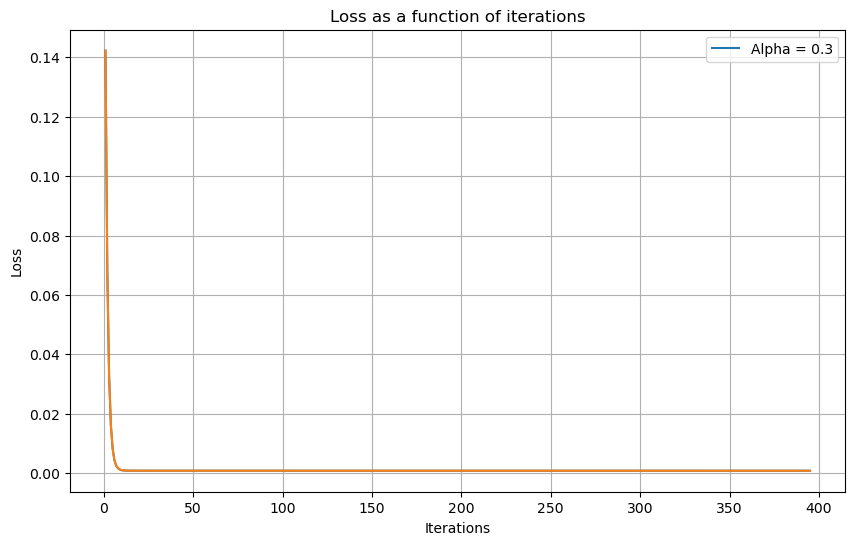

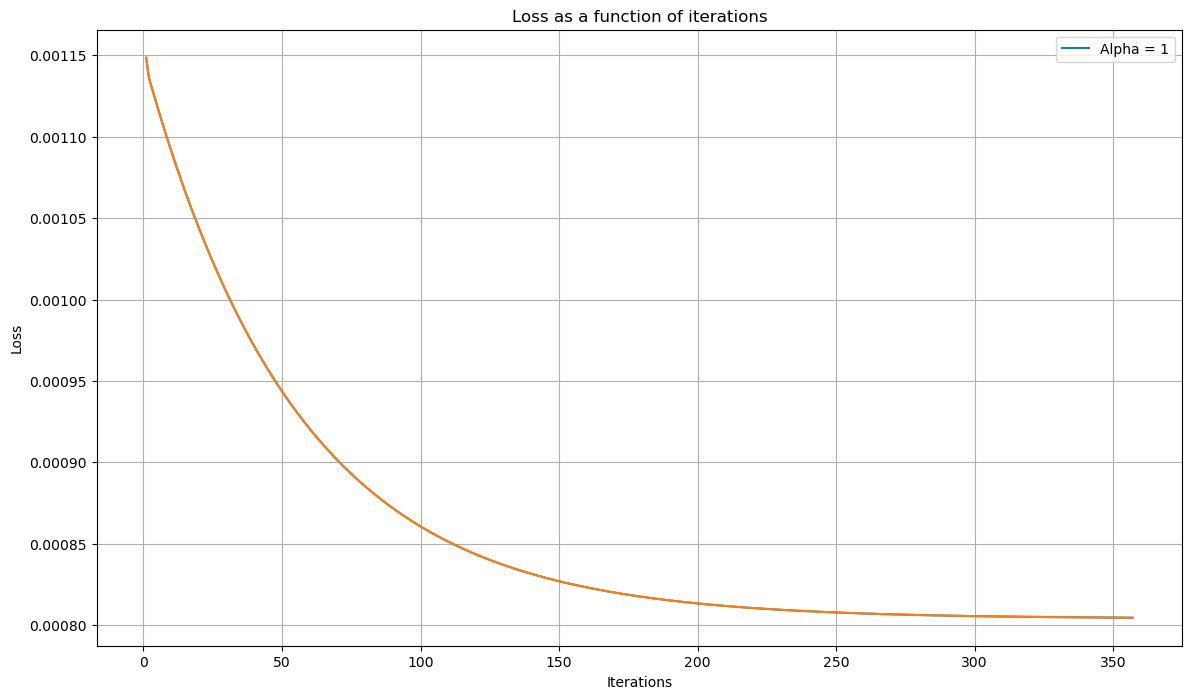

C:\Users\roee\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\roee\AppData\Local\Temp\ipykernel_22936\1675652987.py:34: RuntimeWarning: invalid value encountered in scalar subtract
  if iteration > 0 and abs(J_history[iteration] - J_history[iteration - 1]) < 1e-8: # iteration > 0 so the check starts from the second iteration
C:\Users\roee\AppData\Local\Temp\ipykernel_22936\2779571148.py:19: RuntimeWarning: overflow encountered in square
  squared_errors = (predictions - y) ** 2


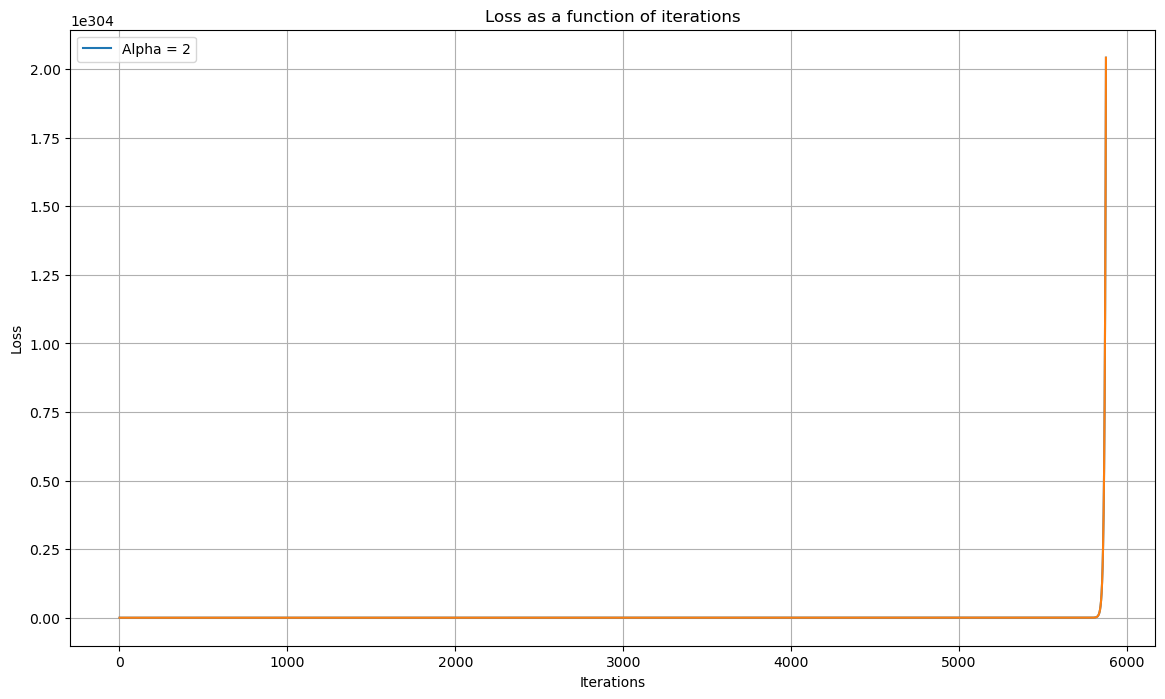

In [23]:
import matplotlib.pyplot as plt

alpha_dict = find_best_alpha(X_train, y_train, X_val, y_val, iterations)
best_alpha_keys = sorted(alpha_dict, key=alpha_dict.get)[:3] #[0.3, 1, 2]


# Step 3 and 4: Plot training loss for each of the best three alpha values
plt.figure(figsize=(10, 6))
for alpha in best_alpha_keys:
    theta = np.random.random(size=2)
    theta, J_history = efficient_gradient_descent(X_train, y_train, theta, alpha, 10000) # Use efficient_gradient_descent to get thetas and loss history
    if J_history:
        plt.plot(range(1, len(J_history) + 1), J_history, label=f'Alpha = {alpha}') # Plot loss history for the current alpha

        plt.plot(range(1, len(J_history) + 1), J_history)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title('Loss as a function of iterations')
        plt.legend()
        plt.grid(True)

        plt.show()


This is yet another sanity check. This function plots the regression lines of your model and the model based on the pseudoinverse calculation. Both models should exhibit the same trend through the data. 

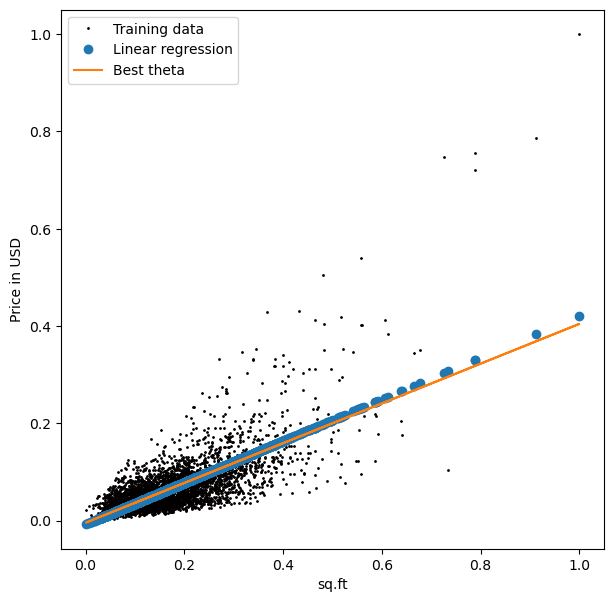

In [24]:
theta = np.random.random(size=2)
theta, J_history = efficient_gradient_descent(X_train, y_train, theta, best_alpha, 10000) # Use efficient_gradient_descent to get
plt.figure(figsize=(7, 7))
plt.plot(X_train[:,1], y_train, 'ro', ms=1, mec='k')
plt.ylabel('Price in USD')
plt.xlabel('sq.ft')
plt.plot(X_train[:, 1], np.dot(X_train, theta), 'o')
plt.plot(X_train[:, 1], np.dot(X_train, theta_pinv), '-')

plt.legend(['Training data', 'Linear regression', 'Best theta']);


## Multivariate Linear Regression

In most cases, you will deal with databases that have more than one feature. It can be as little as two features and up to thousands of features. In those cases, we use a multiple linear regression model. The regression equation is almost the same as the simple linear regression equation:

$$
\hat{y} = h_\theta(\vec{x}) = \theta^T \vec{x} = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n
$$


If you wrote vectorized code, this part should be straightforward. If your code is not vectorized, you should go back and edit your functions such that they support both multivariate and single variable regression. **Your code should not check the dimensionality of the input before running**.

In [25]:
# Read comma separated data
df = pd.read_csv('data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


## Preprocessing

Like in the single variable case, we need to create a numpy array from the dataframe. Before doing so, we should notice that some of the features are clearly irrelevant.

In [26]:
X = df.drop(columns=['price', 'id', 'date']).values
y = df['price'].values

Use the **same** `preprocess` function you implemented previously. Notice that proper vectorized implementation should work regardless of the dimensionality of the input. You might want to check that your code in the previous parts still works.

In [27]:
def preprocess(X, y):
    """
    Perform min max normalization on the features and true labels.

    Input:
    - X: Inputs (n features over m instances). # a matrix where each row represents an instance and each column represents a different feature
    - y: True labels.

    Returns a two vales:
    - X: The normalized inputs.
    - y: The normalized labels.
    """
    X_min = X.min(axis=0) # we use axis=0 to compute the minimum and maximum values column-wise, ensuring that we get the minimum and maximum values for each feature 
    X_max = X.max(axis=0)
    X = (X - X_min) / (X_max - X_min)
    
    y_min = y.min()
    y_max = y.max()
    y = (y - y_min) / (y_max - y_min)
   
    return X, y

In [28]:
# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train,:], X[idx_val,:] #(4000, 17)  (1000, 17)
y_train, y_val = y[idx_train], y[idx_val] #(4000, ) (1000, )


Using 3D visualization, we can still observe trends in the data. Visualizing additional dimensions requires advanced techniques we will learn later in the course.

In [29]:
%matplotlib inline
import mpl_toolkits.mplot3d.axes3d as p3
fig = plt.figure(figsize=(5,5))
ax = p3.Axes3D(fig)
xx = X_train[:, 1][:1000]
yy = X_train[:, 2][:1000]
zz = y_train[:1000]
ax.scatter(xx, yy, zz, marker='o')
ax.set_xlabel('bathrooms')
ax.set_ylabel('sqft_living')
ax.set_zlabel('price')
plt.show()

<Figure size 500x500 with 0 Axes>

Use the bias trick again (add a column of ones as the zeroth column in the both the training and validation datasets).

In [30]:
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train]) # (4000,18)
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val]) #(1000,18)


    

Make sure the functions `compute_cost`, `gradient_descent`, and `pinv` work on the multi-dimensional dataset. If you make any changes, make sure your code still works on the single variable regression model. 

In [31]:
shape = X_train.shape[1] # equals to the numbers of features (theta for each x and 1 intercept) =18 
theta = np.ones(shape) #[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] (17, )
J = compute_cost(X_train, y_train, theta)

In [32]:
np.random.seed(42)
shape = X_train.shape[1]
theta = np.random.random(shape)
iterations = 40000
theta, J_history = gradient_descent(X_train ,y_train, theta, best_alpha, iterations)


C:\Users\roee\AppData\Local\Temp\ipykernel_22936\2779571148.py:19: RuntimeWarning: overflow encountered in square
  squared_errors = (predictions - y) ** 2
C:\Users\roee\AppData\Local\Temp\ipykernel_22936\1518399249.py:29: RuntimeWarning: invalid value encountered in subtract
  theta -= alpha * gradients #𝛼1(ℎ𝜃(𝑥(𝑖))−𝑦(𝑖))𝑥(𝑖)𝑗 /m


In [33]:
theta_pinv = pinv(X_train ,y_train)
J_pinv = compute_cost(X_train, y_train, theta_pinv)

We can use visualization to make sure the code works well. Notice we use logarithmic scale for the number of iterations, since gradient descent converges after ~500 iterations.

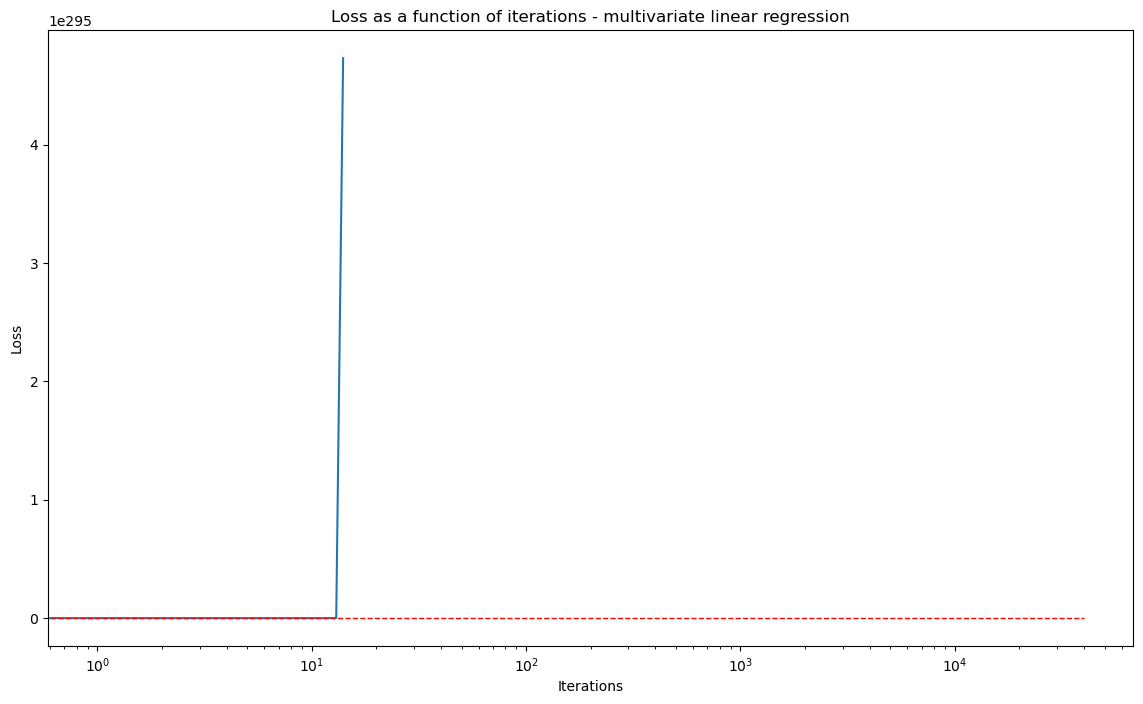

In [34]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations - multivariate linear regression')
plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history), color='r',
           linewidth = 1, linestyle = 'dashed')
plt.show()

## Find best features for regression 

Adding additional features to our regression model makes it more complicated but does not necessarily improves performance. Find the combination of two features that best minimizes the loss. First, we will reload the dataset as a dataframe in order to access the feature names. Use the dataframe with the relevant features as the input to the `generate_couples` and obtain a list of all possible feature couples.

In [35]:
columns_to_drop = ['price', 'id', 'date']
all_features = df.drop(columns=columns_to_drop) #(5000, 17)
all_features.head(5)
# headers = all_features.columns.tolist()
# headers # list of 17 features 
# len(headers)
# X_train.shape

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [36]:
import itertools

def generate_couples(features):
    """
    Generate all possible sets of two features out of all relevant features
    available from the given dataset X.

    Input:
    - features: a dataframe that contains all relevant features.

    Returns:
    - A python list containing all feature couples.
    """
    
    feature_names = features.columns.tolist() # features.columns.tolist()= list of 17
    
    couples = list(itertools.combinations(feature_names, 2))
    
    return couples


In [37]:
couples = generate_couples(all_features) # inserting a data frame (5000,17)
print("Number of couples: {}".format(len(couples)))

Number of couples: 136


Complete the function `find_best_couple`. You are free to use any arguments you need.

In [38]:
def find_best_couple(X_train, y_train, X_val, y_val):
    """
    Iterate over all possible couples and obtain the learned parameters 
    theta by using the training set. Find the couple that minimizes the
    error on the validation set. For better performance, you should use the 
    efficient implementation of gradient descent. Don't forget the bias trick.

    Input:
    - X_train, y_train: Training set.
    - X_val, y_val: Validation set.

    Returns:
    - The names of the best features.
    """
    best_couples = None
    best_error = float('inf')
    num_iters = 1000  # Define num_iters
    alpha = 0.01  # Adjust learning rate

    
    couples = generate_couples(X_train)
    
    for couple in couples:
        X_train_couple = X_train[list(couple)] # convert the couple tuple into a list, and then slice only the columns of the 2 features selected in the couple 
        X_val_couple = X_val[list(couple)] # thus the shape is gonna be (4000,2) and (1000,2)
       
        X_train_couple = (X_train_couple - X_train_couple.mean()) / X_train_couple.std()
        X_val_couple = (X_val_couple - X_val_couple.mean()) / X_val_couple.std()
        
        
        # Applying bias trick - column of 1'es as a first column so the model could capture intercept (bias) situations. 
        X_train_couple = np.column_stack([np.ones((X_train_couple.shape[0],1)) , X_train_couple]) # becomes (4000,3)
        X_val_couple = np.column_stack([np.ones((X_val_couple.shape[0],1)) , X_val_couple]) # becomes (1000,3)
       

        # Initializing some random values for thetas 
        theta = np.random.random(size=X_train_couple.shape[1]) # (3, )

        
        # Train the model using efficient gradient descent
        theta, _ = efficient_gradient_descent(X_train_couple, y_train, theta, alpha, num_iters)
        
        # Compute the error on the validation set
        error = compute_cost(X_val_couple, y_val, theta)
        
        # Update the best couple if the current error is lower
        if error < best_error:
            best_error = error
            best_couples = couple
    
    return best_couples

# Usage example:
# X_train_df = pd.DataFrame(X_train)
# X_val_df = pd.DataFrame(X_val)
X_train_df = pd.DataFrame(X_train)
X_val_df = pd.DataFrame(X_val)
best_couples = find_best_couple(X_train_df, y_train, X_val_df, y_val)
print("Best couple:", best_couples)



Best couple: (3, 14)


In [39]:
feature_names = all_features.columns.tolist() # features.columns.tolist()= list of 17
best_feature1=feature_names[best_couples[0]]
print(best_feature1)
best_feature2=feature_names[best_couples[1]]
print(best_feature2)


sqft_lot
long


# Part 2: Training a KNN Classifier using sklearn

## Data Preprocessing

Before diving into the algorithm, we need to handle our data. We will train our KNN classifier on the MNIST dataset that includes images of the digits 0-9.

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split

def load_data(filename):
    data = pd.read_csv(filename, delimiter=' ', header=None).dropna(axis=1)
    X = data.drop([0], axis=1).values
    y = data[0].values
    return X, y

X, y = load_data('digit.data')

train_size = 1607
test_size  = 400
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = train_size, 
                                                    test_size = test_size, 
                                                    random_state=0)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape) 
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1607, 256)
y_train shape:  (1607,)
X_test shape:  (400, 256)
y_test shape:  (400,)


We can learn that our dataset has 1,607 training examples and 400 test examples and that each image is a vector with 256 features. If we would like to visualize an instance as an image, we first need to reshape it into a 16x16 matrix. Run the cell below <b>multiple</b> times to see different examples in the training set.

Digit:  5


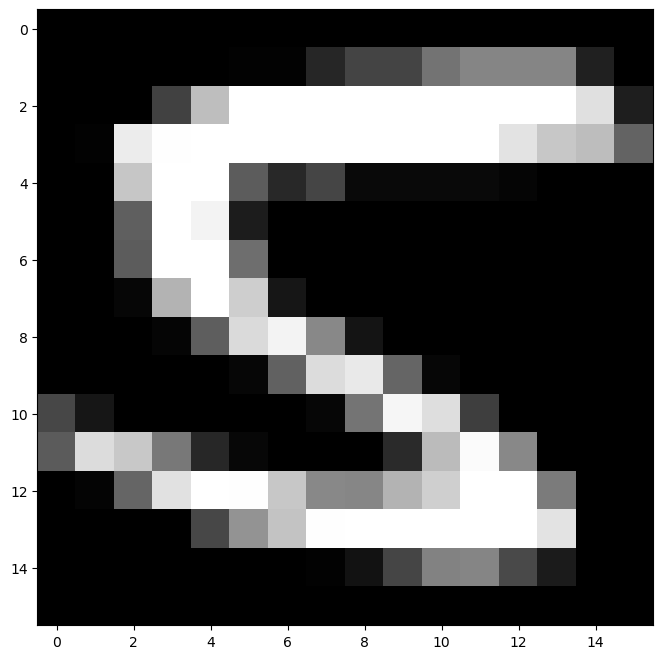

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def vec_to_img(vec):
    return vec.reshape((16, 16))

def imshow(images, labels, index):
    plt.imshow(vec_to_img(images[index]), cmap='gray', interpolation='nearest');
    print("Digit: ", labels[index])
    
random_index = np.random.randint(0, X_train.shape[0])
imshow(X_train, y_train, random_index)

## Training a classifier

1. Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) and understand how to train a KNN classifier. Use the default configurations for now.
1. Make sure you understand how to evaluate the performance of your model using the testing dataset [using the score method](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). 
1. Train 15 models with different values for `k` from 1 to 15.
1. Use the graph of the perfomance of the model as a function of `k` on both the training and testing data and explain the results.

In [42]:
from sklearn.neighbors import KNeighborsClassifier

train_acc = []
test_acc = []

for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k) #  an instance of the KNeighborsClassifier class, which represents the KNN classifier that has been trained with a specific value of k
    
    knn.fit(X_train, y_train)
    
    train_accuracy = knn.score(X_train, y_train)
    train_acc.append(train_accuracy)
    
    test_accuracy = knn.score(X_test, y_test)
    test_acc.append(test_accuracy)
print(train_acc)
print(test_acc)

[1.0, 0.9539514623522091, 0.9502177971375233, 0.940883634100809, 0.9346608587429994, 0.925326695706285, 0.9278158058494088, 0.9228375855631612, 0.9153702551337897, 0.9047915370255134, 0.9066583696328563, 0.9016801493466086, 0.8948350964530181, 0.8911014312383323, 0.8935905413814561]
[0.9125, 0.9025, 0.9075, 0.8925, 0.905, 0.905, 0.9025, 0.905, 0.9, 0.8975, 0.8925, 0.89, 0.8825, 0.8775, 0.87]


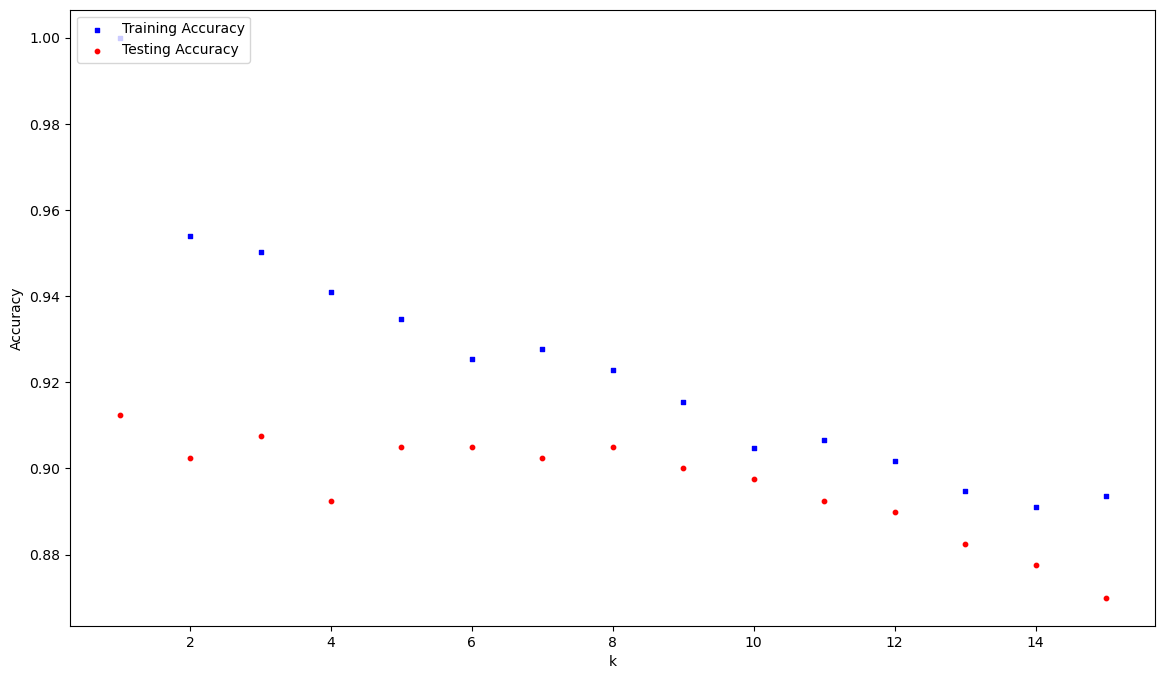

In [43]:
# This will plot the accuracies as a function of k.
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(range(1, 16), train_acc, s=10, c='b', marker="s", label='Training Accuracy')
ax1.scatter(range(1, 16) ,test_acc, s=10, c='r', marker="o", label='Testing Accuracy')
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("k")

plt.legend(loc='upper left');
plt.show()

Q: Explain the results in detail. 
1. What can you say about the training error as a function of k?
1. What about the testing error?
1. Which k do you recommend? What are its test and train errors?

Use this cell for your answer.
1. as k increases the training error increases as well (thus the accuracy decreases as we can see). the reason for that is the as k decreases the complexity of the model increases and it's more capable of capturing more complicated patterns in the training data and memorizing the data. on the other hand, as the the k increases , the model considers more neighbors during the knn classification, and make a more generalized and less accurate model.

2. the results i got from the test set are quite weird. we know that k=1 mean the model is usually too complex , leading to overfitting (great predictions in training , bad in testing). but here k=1 got the best accuracy results. there are some reasons for to happen. first, it's possible that the test set and training set is very similar to each other, thus the model memorizes the training data which helps it to predict on the test set.second, it's possible the data set is simple and well-seperated withput much 'noise' and outliers. another reason is the 'folds' method (we learned with eran) that probably hasn't been applied here, thus the cross validation(test) set we used is skwed. except for that, the testting error graph would fluctuate looking to find the sweet spot (around k=5), after that, the testing error would increase meaning it underfits with high k's values. 

3.despite achieving high accuracy on the test set with k=1 , I won't reccomend using it, because of its tendency to overfit.
i'd reccpmed using k=5. whith this k's value the model balances bias and variance well, resulting in high accuracy on the testing set.its accurecies are:
Training Accuracy: 92.53%
Testing Accuracy: 90.5%

Train a KNN classifier with your chosen k (from the previous question) on <b> 5 </b> different training sample sizes between 10 and 100 (use the "sample_x_y" function to generate them). For each sample size, calculate the error on the full test dataset. <br> Repeat each sample size 10 times with a different random training sample, save all 10 results and average the measurements of the error for each size. Draw a plot of the average test error as a function of the training sample size.

In [44]:
import random
def sample_x_y(x, y, sample_size):
    """ Samples sample_size matching examples from x and y """
    idx = np.random.choice(np.arange(len(x)), sample_size, replace=False) #creates an array of indices ranging from 0 to the length of the array x minus one, sample_size: This parameter specifies how many elements to sample from the array created
    return x[idx], y[idx] #The resulting idx array contains 20 randomly chosen indices, and here we're doing indexing

sample_x_y(X_train,y_train,20) # printing 2 changable arrays (the label array and features array) with 20 randoms instances values

(array([[-1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
        [-1.   , -0.956, -0.905, ..., -1.   , -1.   , -1.   ],
        [-1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
        ...,
        [-1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
        [-1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
        [-1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ]]),
 array([1, 7, 4, 0, 0, 8, 0, 2, 1, 7, 6, 7, 0, 9, 7, 3, 2, 8, 8, 0],
       dtype=int64))

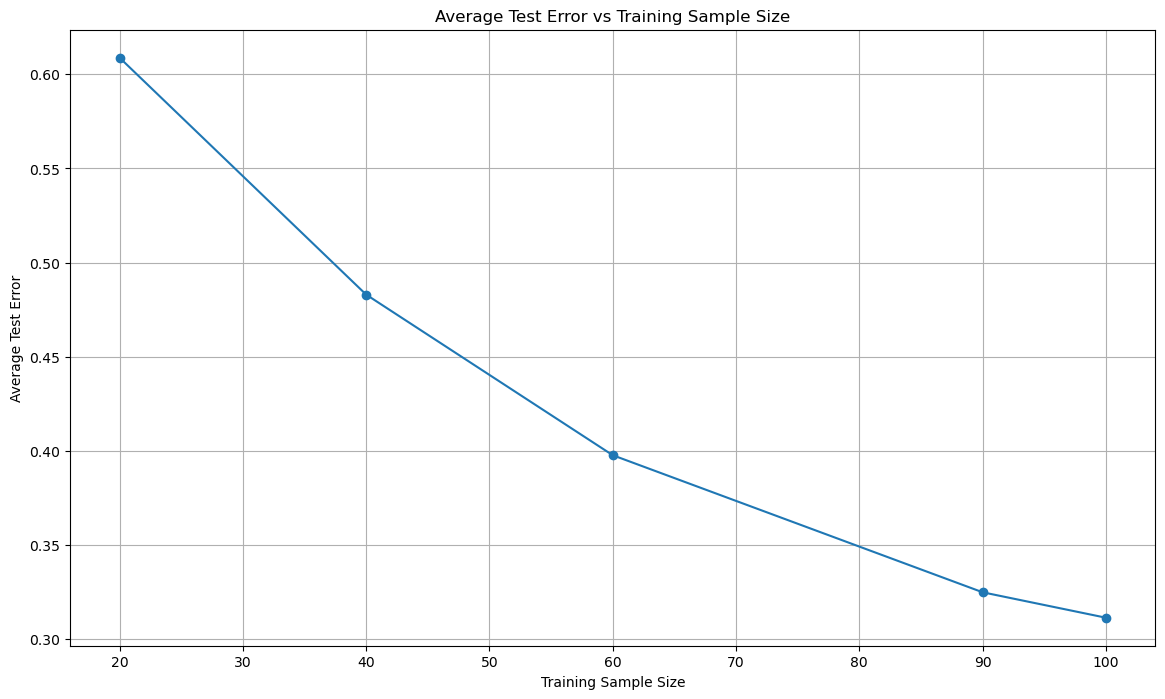

In [45]:
sample_sizes = [20, 40, 60, 90, 100]
sample_err = []

for sample_size in sample_sizes:
    errors = []
    for _ in range(10):
        X_train_sample, y_train_sample = sample_x_y(X_train, y_train, sample_size) # choosing sample size number of random instances
        
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train_sample, y_train_sample) #training
        
        # Evaluate on test data
        error = 1 - knn.score(X_test, y_test)
        errors.append(error)
    
    # Calculate average error for each sample size
    avg_error = np.mean(errors)
    sample_err.append(avg_error)

# Plot average test error as a function of training sample size
plt.plot(sample_sizes, sample_err, marker='o')
plt.xlabel('Training Sample Size')
plt.ylabel('Average Test Error')
plt.title('Average Test Error vs Training Sample Size')
plt.grid(True)
plt.show()


Q: Did you get different results in different runs with the same sample size? Why?

    becuase in the function def sample_x_y(x, y, sample_size): which returns 2 changable arrays (the label array and features array) that the model will be trained based on them, we got this line of code:
    idx = np.random.choice(np.arange(len(x)), sample_size, replace=False)
    np.random.choice function chooses X (X=sampls size) number of indexes from 0 to len(X_train)-1 (in our example is 1607) that and every time we run this function (by iterating the loop) , we get diffrent indexses thus differnt samples for the model to be trained of, althogh the sample size is the same. 
    



Train a KNN classifier with your chosen k on the whole training set. For the output of this run, provide a **[confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)**: a table where each column and each row correspond to one of the digits, and the value in each cell (digit1, digit2) is the number of images in the **test set** that are actually digit1, and were predicted by the algorithm to be digit2. The main diagonal is the correct predictions for each digits. (Use the "plot_confusion_matrix" function to plot the matrix)

In [46]:
def plot_confusion_matrix(cm, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    classes = np.array(range(10))

    fig, ax = plt.subplots(figsize=(8, 8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Confusion matrix',
           ylabel='True label',
           xlabel='Predicted label')

    # Loop over data dimensions and create text annotations.
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

[[69  0  0  0  1  0  1  0  0  0]
 [ 0 54  0  0  0  0  2  0  0  0]
 [ 6  0 30  0  0  0  0  1  0  0]
 [ 2  0  0 28  0  2  0  1  0  0]
 [ 0  2  0  0 37  0  0  1  1  4]
 [ 0  0  0  2  0 16  0  0  0  0]
 [ 0  0  1  0  1  0 32  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 1  0  1  3  0  0  0  0 28  2]
 [ 1  0  0  0  1  0  0  1  0 34]]


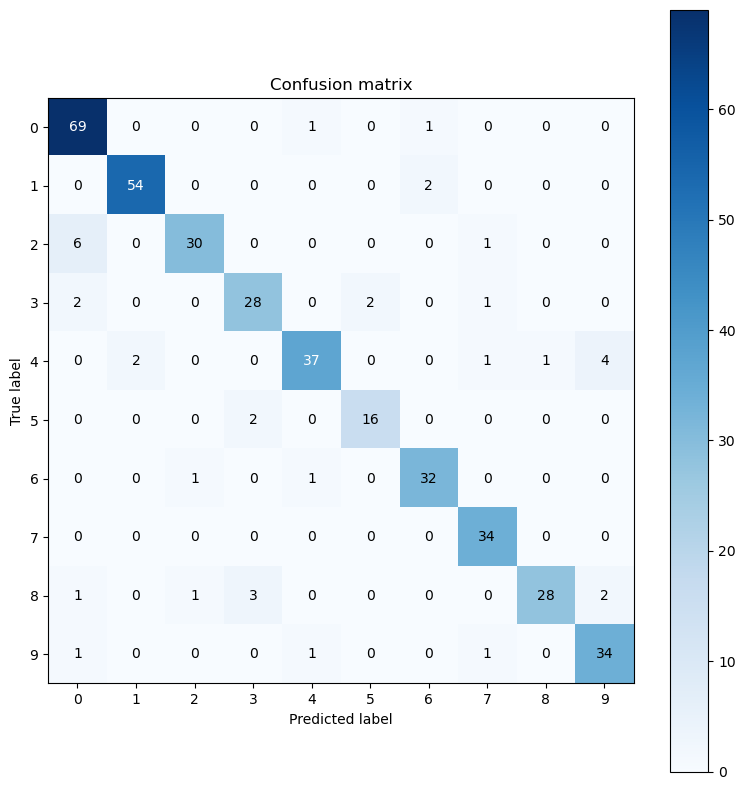

In [47]:
from sklearn.metrics import confusion_matrix

# Train KNN classifier on the whole training set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict labels for the test set
y_pred = knn.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plot_confusion_matrix(cm)
plt.show()


Q: What are the 3 highest off-diagonal values in the confusion matrix? Explain.

6,4,3
that means there were 6/4/3 instances (of the same class-number) that were misclassified as belonging to a different class ( number).
it helps us to understand which classes are commonly confused with each other. the most common mistake is when the image represents the number of 2, but our model predicted it to be 0. 

Q: Why isn't the confusion matrix symmetric?

the confusion matrix isn't symmetric because the model does not make the same number of errors in both directions. meaning that he can misclassified multiple times an image to be in class 0 althogh it's in class 2, but on the other hand, won't get confused at all in classifing an image belong to class 0, to be in class 2. there could be more reasons for why isn't the confusion matrix symmetric, such as the classes are not equally represented in the dataset and there are classes with more instances, thus statistically more mistakes of misclassifing class are expected

Show the distribution of the digits in the training set (what percentage of the labels are of each digit)

In [48]:
digit_counts = np.bincount(y_train)
total_labels = y_train.shape[0]
digit_percentages = (digit_counts / total_labels) * 100

for digit, percentage in enumerate(digit_percentages):
    print(f"Digit {digit}: {percentage:.2f}%")


Digit 0: 17.92%
Digit 1: 12.94%
Digit 2: 10.02%
Digit 3: 8.28%
Digit 4: 9.65%
Digit 5: 8.84%
Digit 6: 8.46%
Digit 7: 7.03%
Digit 8: 8.15%
Digit 9: 8.71%


Q: How can the training set digits distribution help to explain some of the mistakes shown in the confusion matrix?

from the distribution of the data, we can learn that if the frequency of some digits in the training set is high (such as 0), it can influence for good the model's predictions on these numbers, because it lerned their charactersitics well, and on the other hand, digits that are underrepresented in the training set could lead to error in the predictions due to the lack of sufficient training data for those digits (such as the number 8). in adddition a digit with a big chunk of the distribution in the training set, could lead the model to become biased towards those digits. the example for that is that the number 2 predicted as the digit 0 six times. 

In [49]:
גג

NameError: name 'גג' is not defined